In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
#import timestamp
import geopandas
from shapely.geometry import Point

In [39]:
data1 = pd.read_csv("sc-bike-data_1022.csv")
data2 = pd.read_csv("sc-bike-data_ending1027.csv")
data3 = pd.read_csv("sc-bike-data-ending1031.csv")
data4 = pd.read_csv("sc-bike-data_1031.csv")
data5 = pd.read_csv("sc_bike_1105.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
data_test1 = pd.read_csv("sc-bike-data_1022.csv")
data_test2 = data5.head()

In [52]:
data_all = pd.concat([data1, data2, data3, data4, data5], ignore_index=True, sort = False)

In [61]:
data_all.head()

,Unnamed: 0,bike_id,is_disabled,is_reserved,jump_ebike_battery_level,lat,lon,name,datetime,update_time
0,0,bike_23366,0,0,72%,36.967843,-121.999688,1497,1540307790,NaN
1,1,bike_23360,0,0,54%,36.971092,-122.024257,1391,1540307790,NaN
2,2,bike_20799,0,0,63%,36.976315,-121.977732,958,1540307790,NaN
3,3,bike_21411,0,0,66%,36.952708,-122.064642,1341,1540307790,NaN
4,4,bike_20790,0,0,91%,36.962897,-122.045212,887,1540307790,NaN


In [63]:
data_all.drop('Unnamed: 0', axis =1, inplace=True)
with open('all-sc-bike-data-1101.csv', mode='w+') as f:
    f.write(data_all.to_csv(header=True, index=False))

In [58]:
data_all.describe()

,Unnamed: 0,is_disabled,is_reserved,lat,lon,datetime,update_time
count,1.612234e+06,1612234.0,1612234.0,1.612234e+06,1.612234e+06,1.612234e+06,96695.0
mean,6.341517e+01,0.0,0.0,3.697375e+01,-1.220227e+02,1.540691e+09,60.0
std,3.875559e+01,0.0,0.0,1.114004e-02,1.884949e-02,2.245306e+05,0.0
min,0.000000e+00,0.0,0.0,3.693204e+01,-1.220838e+02,1.540308e+09,60.0
25%,3.100000e+01,0.0,0.0,3.696572e+01,-1.220335e+02,1.540500e+09,60.0
50%,6.200000e+01,0.0,0.0,3.697391e+01,-1.220238e+02,1.540675e+09,60.0
75%,9.400000e+01,0.0,0.0,3.698326e+01,-1.220112e+02,1.540891e+09,60.0
max,1.690000e+02,0.0,0.0,3.701715e+01,-1.217648e+02,1.541095e+09,60.0


In [40]:
data5.sample(10)

,Unnamed: 0,bike_id,is_disabled,is_reserved,jump_ebike_battery_level,lat,lon,name,datetime,update_time
34177,94,bike_23369,0,0,50%,36.968908,-122.027062,921,1541053946,60
41480,30,bike_23322,0,0,49%,36.950355,-122.052912,1539,1541058708,60
64107,4,bike_21416,0,0,44%,36.988480,-122.026682,1359,1541072788,60
37485,13,bike_21189,0,0,90%,36.952040,-122.042502,854,1541056146,60
76105,79,bike_21220,0,0,44%,36.952820,-122.043910,1007,1541080047,60
33850,66,bike_23288,0,0,46%,36.982197,-122.031755,1287,1541053758,60
85965,1,bike_23330,0,0,55%,36.993763,-122.065108,1473,1541086729,60
52644,27,bike_23308,0,0,27%,36.961753,-121.995082,1474,1541065790,60
57344,61,bike_23347,0,0,39%,36.955563,-122.042038,1554,1541068597,60
82388,9,bike_21173,0,0,46%,36.958912,-122.045680,980,1541084273,60


In [23]:
data['jump_ebike_battery_level'] = data['jump_ebike_battery_level'].str.strip('%').astype(int)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 10 columns):
Unnamed: 0                  1110 non-null int64
bike_id                     1110 non-null object
is_disabled                 1110 non-null int64
is_reserved                 1110 non-null int64
jump_ebike_battery_level    1110 non-null int64
lat                         1110 non-null float64
lon                         1110 non-null float64
name                        1110 non-null int64
datetime                    1110 non-null int64
update_time                 1110 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 86.8+ KB


In [25]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1540351671))

'2018-10-23 20:27:51'

In [28]:
bike23360 = data[data['bike_id'] == 'bike_21123']

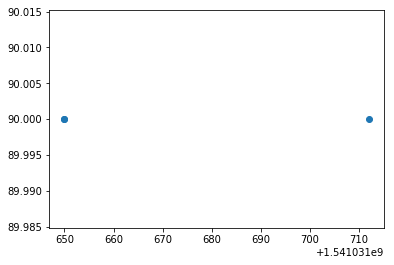

In [29]:
plt.scatter(bike23360['datetime'], bike23360['jump_ebike_battery_level'])

In [30]:
len(data['regtime'].unique())

6089

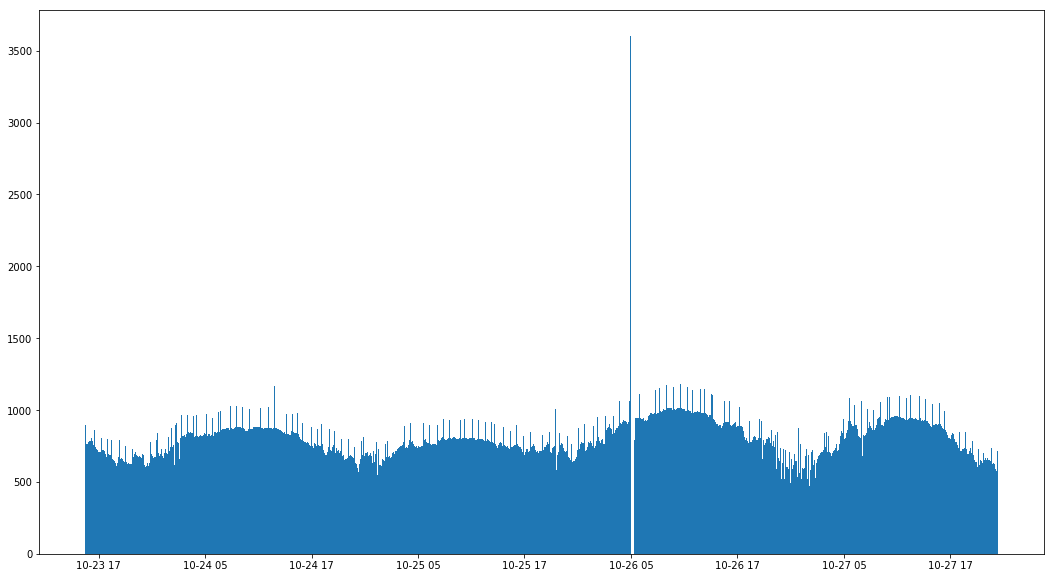

In [32]:
fig, ax = plt.subplots( figsize = (18,10))
ax.hist(data['regtime'], bins=1000)
plt.show()

In [16]:
data['regtime'] = pd.to_datetime(data['datetime'], unit='s')

In [17]:
data['regtime'][100]-data['regtime'][0]

NameError: name 'data' is not defined

In [37]:
data['geometry'] = data.apply(lambda z: Point(z.lat, z.lon), axis=1)

In [38]:
geodata = geopandas.GeoDataFrame(data)

In [47]:
g = geodata.groupby(by=['bike_id','lat'])

In [55]:
g.describe()['jump_ebike_battery_level']

count       mean       std   min   25%   50%   75%  \
bike_id    lat                                                              
bike_20631 36.960650   275.0  26.432727  0.496357  26.0  26.0  26.0  27.0   
           36.962020    31.0  30.000000  0.000000  30.0  30.0  30.0  30.0   
           36.962362    64.0  57.000000  0.000000  57.0  57.0  57.0  57.0   
           36.963692     7.0  82.000000  0.000000  82.0  82.0  82.0  82.0   
           36.966510   171.0  34.000000  0.000000  34.0  34.0  34.0  34.0   
           36.966895   134.0  49.000000  0.000000  49.0  49.0  49.0  49.0   
           36.966915     1.0  23.000000       NaN  23.0  23.0  23.0  23.0   
           36.969158    24.0  45.000000  0.000000  45.0  45.0  45.0  45.0   
           36.969852     5.0  54.000000  0.000000  54.0  54.0  54.0  54.0   
           36.970602   527.0  26.000000  0.000000  26.0  26.0  26.0  26.0   
           36.971037    88.0  46.000000  0.000000  46.0  46.0  46.0  46.0   
           36.972583    19.0  98.000000  0.000000  98.0  98.0  98.0  98.0   
           36.972925     1.0  22.000000       NaN  22.0  22.0  22.0  22.0   
           36.973000    82.0  72.000000  0.000000  72.0  72.0  72.0  72.0   
           36.974247     6.0  93.000000  0.000000  93.0  93.0  93.0  93.0   
           36.975760    16.0  42.000000  0.000000  42.0  42.0  42.0  42.0   
           36.977692    30.0  50.000000  0.000000  50.0  50.0  50.0  50.0   
           36.987252    48.0  94.000000  0.000000  94.0  94.0  94.0  94.0   
           36.987327    53.0  96.000000  0.000000  96.0  96.0  96.0  96.0   
           36.992632     1.0  71.000000       NaN  71.0  71.0  71.0  71.0   
bike_20632 36.960442    37.0  38.000000  0.000000  38.0  38.0  38.0  38.0   
           36.962452   106.0  81.000000  0.000000  81.0  81.0  81.0  81.0   
           36.962467   210.0  86.000000  0.000000  86.0  86.0  86.0  86.0   
           36.962470   214.0  81.000000  0.000000  81.0  81.0  81.0  81.0   
           36.962482   632.0  83.655063  1.344593  81.0  83.0  83.0  85.0   
           36.962498   141.0  87.000000  0.000000  87.0  87.0  87.0  87.0   
           36.963888   402.0  64.445274  0.497615  64.0  64.0  64.0  65.0   
           36.965355     1.0  94.000000       NaN  94.0  94.0  94.0  94.0   
           36.965812   173.0  95.000000  0.000000  95.0  95.0  95.0  95.0   
           36.969733    46.0  84.000000  0.000000  84.0  84.0  84.0  84.0   
...                      ...        ...       ...   ...   ...   ...   ...   
bike_26976 36.964575   819.0  92.000000  0.000000  92.0  92.0  92.0  92.0   
           36.964585    90.0  92.000000  0.000000  92.0  92.0  92.0  92.0   
           36.975722   115.0  27.000000  0.000000  27.0  27.0  27.0  27.0   
           36.975742     6.0  27.000000  0.000000  27.0  27.0  27.0  27.0   
           36.982972  4105.0  29.101096  0.301493  29.0  29.0  29.0  29.0   
           36.987180   174.0  34.344828  0.476684  34.0  34.0  34.0  35.0   
           36.987262   210.0  34.000000  0.000000  34.0  34.0  34.0  34.0   
bike_26977 36.953105    56.0  66.000000  0.000000  66.0  66.0  66.0  66.0   
           36.961907     1.0  81.000000       NaN  81.0  81.0  81.0  81.0   
           36.962333     1.0  82.000000       NaN  82.0  82.0  82.0  82.0   
           36.963640   183.0  76.327869  0.470725  76.0  76.0  76.0  77.0   
           36.963672   627.0  68.818182  3.186251  59.0  70.0  70.0  70.0   
           36.963730   693.0  89.000000  0.000000  89.0  89.0  89.0  89.0   
           36.964193     3.0  81.000000  0.000000  81.0  81.0  81.0  81.0   
           36.964273    20.0  74.000000  0.000000  74.0  74.0  74.0  74.0   
           36.964377    41.0  83.000000  0.000000  83.0  83.0  83.0  83.0   
           36.964477     2.0  83.000000  0.000000  83.0  83.0  83.0  83.0   
           36.964483     1.0  83.000000       NaN  83.0  83.0  83.0  83.0   
           36.965658  2445.0  40.931697  0.804446  40.0  40.0  41.0  42.0   
           36.96875

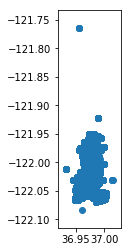

In [40]:
geodata.plot()

In [56]:
geopandas.read_file('Zoning')

,OBJECTID,ZONING,SHAPE_LENG,SHAPEarea,SHAPElen,geometry
0,23,CC,0.005469,1.125082e+05,1772.315833,"POLYGON ((6115648.111000001 1818541.042999998,..."
1,24,PK,0.002634,4.084068e+04,881.121721,"POLYGON ((6114770.856000006 1817930.811000004,..."
2,25,RM,0.013191,5.012602e+05,4361.125116,"POLYGON ((6114341.5 1818988.125, 6114368.22599..."
3,26,CT,0.020528,1.400059e+06,6890.346622,"POLYGON ((6114905.5 1819702.375, 6115071.5 181..."
4,27,CC,0.003188,5.038172e+04,1046.563196,"POLYGON ((6115484.502000004 1817765.548999995,..."
5,28,PF,0.003826,6.384026e+04,1234.140922,"POLYGON ((6115665.5 1817695.75, 6115768 181778..."
6,29,PF,0.004074,7.906797e+04,1287.481669,"POLYGON ((6115496.276999995 1817943.650999993,..."
7,30,PK,0.002421,2.495794e+04,751.751777,"POLYGON ((6115768 1817782.375, 6115665.5 18176..."
8,31,PK,0.000739,2.411716e+03,252.919175,"POLYGON ((6114408.960999995 1816607.459000006,..."
9,32,PK,0.006211,2.626977e+05,2045.291434,"POLYGON ((6110106.533000007 1817230.009000003,..."


In [6]:
data2 = pd.read_csv("sc_bike_1105.csv")

In [8]:
times = data2['datetime'].unique()

In [9]:
times.sort()

In [65]:
clean_times = pd.to_datetime(times, unit='s')

In [67]:
clean_times[100] - clean_times[5]

Timedelta('0 days 01:41:34')